# • project objective:

We needs to collect data by scraping the website "https://2u.pw/AXCb7" to get GDP data to analyze, and answer some questions

#### Evaluate the dataset containing the GDPs of different countries to:

• Find the country with the highest GDP and the country with the lowest GDP

• Print out the entire list of the countries with their GDPs

• Print the highest GDP value, lowest GDP value, mean GDP value, standardized GDP 
value, and the sum of all the GDPs

• the top 5 highest GDP countries 

• Share of World GDP for the top six 

****

In [118]:
import pandas as pd 
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
data=pd.read_csv('web_data_cleaned.csv')

In [120]:
data.head()

,ID,Country,"GDP (nominal, 2017)",GDP growth,Population (2017),GDP per capita,Share of World GDP
0,1,United States,19485394000000,2.27%,325084756,"$59,939",24.08%
1,2,China,12237700479375,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,4872415104315,1.71%,127502725,"$38,214",6.02%
3,4,Germany,3693204332230,2.22%,82658409,"$44,680",4.56%
4,5,India,2650725335364,6.68%,1338676785,"$1,980",3.28%


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   190 non-null    int64 
 1   Country              190 non-null    object
 2   GDP (nominal, 2017)  190 non-null    int64 
 3   GDP growth           190 non-null    object
 4   Population (2017)    190 non-null    int64 
 5   GDP per capita       190 non-null    object
 6   Share of World GDP   190 non-null    object
dtypes: int64(3), object(4)
memory usage: 10.5+ KB


In [122]:
data.isna().any()

ID                     False
Country                False
GDP (nominal, 2017)    False
GDP growth             False
Population (2017)      False
GDP per capita         False
Share of World GDP     False
dtype: bool

In [123]:
data['Country'].duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
185    False
186    False
187    False
188    False
189    False
Name: Country, Length: 190, dtype: bool

In [124]:
df = clean_columns(data, case = 'pascal')

6 column names have been cleaned

In [125]:
df

,Id,Country,GdpNominal2017,GdpGrowth,Population2017,GdpPerCapita,ShareOfWorldGdp
0,1,United States,19485394000000,2.27%,325084756,"$59,939",24.08%
1,2,China,12237700479375,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,4872415104315,1.71%,127502725,"$38,214",6.02%
3,4,Germany,3693204332230,2.22%,82658409,"$44,680",4.56%
4,5,India,2650725335364,6.68%,1338676785,"$1,980",3.28%
...,...,...,...,...,...,...,...
185,186,Micronesia,336427500,3.20%,532899,$631,0.00%
186,187,Palau,289823500,-3.57%,17808,"$16,275",0.00%
187,188,Marshall Islands,204173430,3.60%,58058,"$3,517",0.00%
188,189,Kiribati,185572502,0.33%,114158,"$1,626",0.00%


In [126]:
df = clean_columns(df, case = 'pascal', replace = {'GdpNominal2017':'GDP',
'Population2017':'Population'})

2 column names have been cleaned

In [127]:
df

,Id,Country,Gdp,GdpGrowth,Population,GdpPerCapita,ShareOfWorldGdp
0,1,United States,19485394000000,2.27%,325084756,"$59,939",24.08%
1,2,China,12237700479375,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,4872415104315,1.71%,127502725,"$38,214",6.02%
3,4,Germany,3693204332230,2.22%,82658409,"$44,680",4.56%
4,5,India,2650725335364,6.68%,1338676785,"$1,980",3.28%
...,...,...,...,...,...,...,...
185,186,Micronesia,336427500,3.20%,532899,$631,0.00%
186,187,Palau,289823500,-3.57%,17808,"$16,275",0.00%
187,188,Marshall Islands,204173430,3.60%,58058,"$3,517",0.00%
188,189,Kiribati,185572502,0.33%,114158,"$1,626",0.00%


***

## EDA

we needs to konw iqr to find the out liyers 

- min_out=q1-1.5*iqr
- max-out=q3+1.5*iqr

In [128]:
from scipy.stats import iqr

In [129]:
iqr=iqr(df['Gdp'])
iqr

203638354736.0

we needs to konw q1&q3 to find the out liyers 

In [130]:
q1=np.percentile(df['Gdp'],25)
q1

8121905952.5

In [131]:
q3=np.percentile(df['Gdp'],75)
q3

211760260688.5

In [132]:
#outliers
min_out=q1-1.5*iqr
max_out=q3+1.5*iqr

In [133]:
min_out

-297335626151.5

In [134]:
max_out

517217792792.5

This means that any value that exceeds the outliers in GDP must be eliminated

In [135]:
df['Gdp'].describe()

count    1.900000e+02
mean     4.188098e+11
std      1.755006e+12
min      3.973132e+07
25%      8.121906e+09
50%      3.639298e+10
75%      2.117603e+11
max      1.948539e+13
Name: Gdp, dtype: float64

In [136]:
1.948539e+13>max_out
#As you can see here, there is a skip to the outliers in the max ,'right skewed'

True

In [137]:
3.973132e+07<min_out
# its fine , 

False

- right skewed , mean>meadian , skewed to the right
- ____[__]______________*  , box plot
- left skewed  , mean>meadian , 
- *____________________[___]____
- symmetrical mean=meadian

In [138]:
mean=df['Gdp'].mean()
mean

418809811567.5263

In [139]:
meadian=df['Gdp'].median()
meadian

36392981114.5

In [140]:
meadian<mean

True

In [141]:
import seaborn as sns

<AxesSubplot:xlabel='Gdp'>

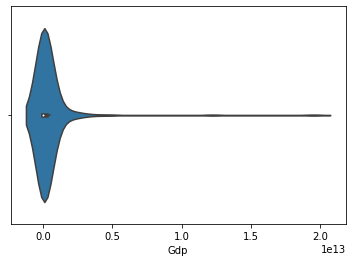

In [142]:
sns.violinplot(x=df["Gdp"])

<AxesSubplot:xlabel='Gdp'>

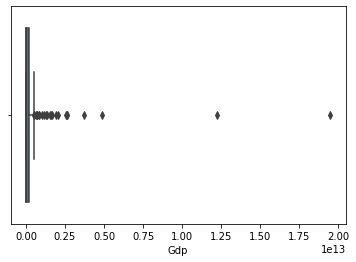

In [143]:
sns.boxplot(x=df["Gdp"])

handling outliers

In [144]:
df= df[df['Gdp'] > max_out]

In [145]:
df

,Id,Country,Gdp,GdpGrowth,Population,GdpPerCapita,ShareOfWorldGdp
0,1,United States,19485394000000,2.27%,325084756,"$59,939",24.08%
1,2,China,12237700479375,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,4872415104315,1.71%,127502725,"$38,214",6.02%
3,4,Germany,3693204332230,2.22%,82658409,"$44,680",4.56%
4,5,India,2650725335364,6.68%,1338676785,"$1,980",3.28%
5,6,United Kingdom,2637866340434,1.79%,66727461,"$39,532",3.26%
6,7,France,2582501307216,1.82%,64842509,"$39,827",3.19%
7,8,Brazil,2053594877013,0.98%,207833823,"$9,881",2.54%
8,9,Italy,1943835376342,1.50%,60673701,"$32,038",2.40%
9,10,Canada,1647120175449,3.05%,36732095,"$44,841",2.04%


<AxesSubplot:xlabel='Gdp'>

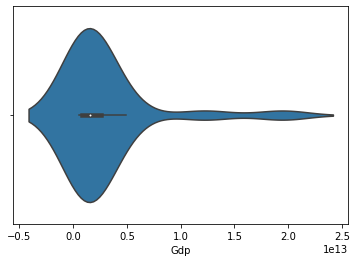

In [146]:
sns.violinplot(x=df["Gdp"])

Obviously we dropped some countries that were outside the outliers in their GDP, we could have let them be ,but we are not going to use them in the analysis anyway

In [147]:
from pandas_profiling import ProfileReport

In [206]:
profile = ProfileReport(df)
profile.to_file("EDA.html")

c:\Users\lenovo ideapad130\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

***

faster

In [149]:
data['GDP (nominal, 2017)'].max()

19485394000000

In [150]:
data[(data['GDP (nominal, 2017)']==19485394000000)]

,ID,Country,"GDP (nominal, 2017)",GDP growth,Population (2017),GDP per capita,Share of World GDP
0,1,United States,19485394000000,2.27%,325084756,"$59,939",24.08%


*****

### Analyze the data and answer the questions

the country with the lowest GDP

In [151]:
lowest=df['Gdp'].min()
lowest

526465839003

In [152]:
df[(df['Gdp']==lowest)]

,Id,Country,Gdp,GdpGrowth,Population,GdpPerCapita,ShareOfWorldGdp
22,23,Poland,526465839003,4.81%,37953180,"$13,871",0.65%


the country with the highest GDP

In [153]:
highest=df['Gdp'].max()
highest

19485394000000

In [154]:
df[(df['Gdp']==highest)]

,Id,Country,Gdp,GdpGrowth,Population,GdpPerCapita,ShareOfWorldGdp
0,1,United States,19485394000000,2.27%,325084756,"$59,939",24.08%


In [155]:
#we can use it 
#h=np.where(df['Gdp'] == highest)
#df.iloc[h]

****

 Print out the entire list of the countries with their GDPs

In [156]:
list=df[['Country','Gdp']]
list

,Country,Gdp
0,United States,19485394000000
1,China,12237700479375
2,Japan,4872415104315
3,Germany,3693204332230
4,India,2650725335364
5,United Kingdom,2637866340434
6,France,2582501307216
7,Brazil,2053594877013
8,Italy,1943835376342
9,Canada,1647120175449


In [157]:
list.values.tolist()

[['United States', 19485394000000],
 ['China', 12237700479375],
 ['Japan', 4872415104315],
 ['Germany', 3693204332230],
 ['India', 2650725335364],
 ['United Kingdom', 2637866340434],
 ['France', 2582501307216],
 ['Brazil', 2053594877013],
 ['Italy', 1943835376342],
 ['Canada', 1647120175449],
 ['Russia', 1578417211937],
 ['South Korea', 1530750923149],
 ['Australia', 1323421072479],
 ['Spain', 1314314164402],
 ['Mexico', 1150887823404],
 ['Indonesia', 1015420587285],
 ['Turkey', 851549299635],
 ['Netherlands', 830572618850],
 ['Saudi Arabia', 686738400000],
 ['Switzerland', 678965423322],
 ['Argentina', 637430331479],
 ['Sweden', 535607385506],
 ['Poland', 526465839003]]

In [158]:
#a=df.filter(['Country','Gdp'])
#p=a.values.tolist()

********

Print the highest GDP value, lowest GDP value, mean GDP value, standardized GDP 
value, and the sum of all the GDPs

In [170]:
df['Gdp'].describe()

count    2.300000e+01
mean     2.889778e+12
std      4.369850e+12
min      5.264658e+11
25%      8.410610e+11
50%      1.530751e+12
75%      2.610184e+12
max      1.948539e+13
Name: Gdp, dtype: float64

*****

the top 5 highest GDP countries 

In [197]:
K=df[['Country','Gdp']].head()

In [198]:
K

,Country,Gdp
0,United States,19485394000000
1,China,12237700479375
2,Japan,4872415104315
3,Germany,3693204332230
4,India,2650725335364


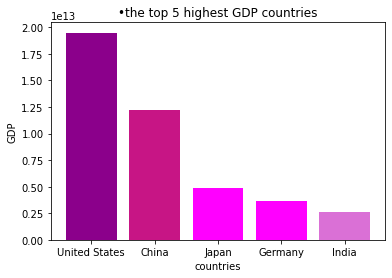

In [200]:
plt.bar(K['Country'],K['Gdp'],color=['darkmagenta', 'mediumvioletred', 'magenta', 'magenta', 'orchid'])
plt.xlabel('countries')
plt.ylabel('GDP')
plt.title('•the top 5 highest GDP countries')#deeppink mediumvioletred darkmagenta
plt.plot(figsize=(100,100))
plt.show()

******

Share of World GDP for the top six

In [201]:
P=df[['Country','ShareOfWorldGdp']].head(6)
P

,Country,ShareOfWorldGdp
0,United States,24.08%
1,China,15.12%
2,Japan,6.02%
3,Germany,4.56%
4,India,3.28%
5,United Kingdom,3.26%


In [202]:
P['ShareOfWorldGdp'] = P['ShareOfWorldGdp'].str.rstrip('%').astype('float')/100.0

In [203]:
P

,Country,ShareOfWorldGdp
0,United States,0.2408
1,China,0.1512
2,Japan,0.0602
3,Germany,0.0456
4,India,0.0328
5,United Kingdom,0.0326


In [204]:
P.dtypes

Country             object
ShareOfWorldGdp    float64
dtype: object

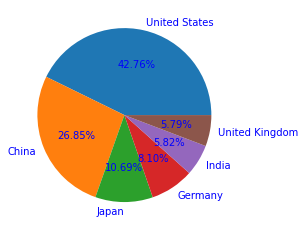

In [205]:
plt.pie(P['ShareOfWorldGdp'],labels=P['Country'],autopct='%1.2f%%',textprops={'color':"b"})
plt.plot(figsize=(20,10))
plt.show()